In [1]:
####################################################################################
########################  PAPERS TO BE REFERRED TO #################################
###
###  [1] Lapeyre, G., P. Klein, 2006a: Dynamics of the upper oceanic layers in terms 
###      of surface quasigeostrophic theory. J.P.O. 36, 165-176.
###
###  [2] Klein, P., Hua B.L., G. Lapeyre, X. Capet, S. LeGentil and H. Sasaki., 2008. 
###      Upper Ocean Dynamics from High 3-D Resolution Simulations.J.P.O., 38, 8, 1748???1763. 
###
###  [3] Klein P., J. Isern-Fontanet, G. Lapeyre, G. Roullet, E. Danioux, 
###      B. Chapron, S.Le Gentil and H. Sasaki, 2009. 
###      Diagnosis of vertical velocities in the upper ocean from high resolution 
###      Sea Surface Height.VOL. 36, L12603, doi:10.1029/2009GL038359. 
###
###  [4] Carli, E., Siegelman, L., Morrow, R., and Vergara, O., 2024. 
###      Surface Quasi Geostrophic Reconstruction of Vertical Velocities and Vertical 
###      Heat Fluxes in the Southern Ocean: Perspectives for SWOT. 
###      Journal of Geophysical Research: Oceans, 129(9). https://doi.org/10.1029/2024JC021216
###
###  [5] Carli, E., Tranchant, Y-T., Siegelman, L., Le Guillou, F., Morrow, R., Ballarotta, M., 
###      Vergara, O., 2024. Small-scale eddy diagnostics around the Southern Ocean Polar Front 
###      with SWOT. ESS Open Archive . January 11, 2025. DOI: 10.22541/essoar.173655546.61867308/v1
###
#################################################################################### 
###
###      COPYRIGHT: Patrice KLEIN, Lia Siegelman, Elisa Carli, April 2025 
###
###
####################################################################################

In [2]:
import numpy as np
import xarray as xr
from sqg_fcts import *

## 1. Upload data and define contants 

In [4]:
# Upload and transpose your dataset in the order (k, j, i)
ds = xr.open_dataset("../ds_test_eSQG")

# ds = xr.open_zarr("/work/LEGOS/data/alti/mesoscale/MIT_COAS_ACC_coupled/ds_March29_COAS/").mean('time').transpose('k','k_l', 'j','j_g', 'i', 'i_g', ...)


In [5]:
#############################################
#### Insert you optimized values for N0 and cc 
############################################

N02 = 3.72e-6 
N0=np.sqrt(N02)

cc=1.20

In [6]:
# Definition of constants, dependent on zone
g = 9.81
f0 = 1e-4
N0of0=N0/f0
rho0=1.e+3

z_mean = ds.Z.values

gof0=g/f0
Rho0oN02og=rho0/N02/g
goN02orho0=g/N02/rho0
rho_cst=N0of0*rho0
zz_rmean= z_mean*N0of0

## 2. Filter your SSH to eliminate structures smaller than 20 km 

Use you favourite filter to remove the smallest scales

## 3. Apply eSQG reconstruction

In [10]:
ssh_sqg = ssh_preprocessing_sqg(ds.filtered_ssh)

In [11]:
 # grid spacing is non-uniform. This is a 2D varialbe of which we take the mean
dx = ds.DXC.mean()       
dy = ds.DYC.mean()

M_double, L_double = ssh_sqg.shape[0:2]
kx,ky,kkx,kky,kk = get_kxky(L_double,M_double,dx.data,dy.data)

In [12]:
matrix_2d = sqg_w(ssh_sqg,
              cc, rho_cst, (M_double), (L_double), N, 
              kk, kkx, kky, 
              zz_rmean, goN02orho0, gof0)
    
# Convert the matrix to an xarray DataArray with appropriate dimensions
w = xr.DataArray(matrix_2d, dims=['k','j','i'], 
                 coords={'k':ds.Z,
                          'i':ds.i.isel(i=slice(3,-3)),
                          'j':ds.j.isel(j=slice(3,-3)),
                         }
                 )


## Plots

In [13]:
import cmocean
import matplotlib.pyplot as plt

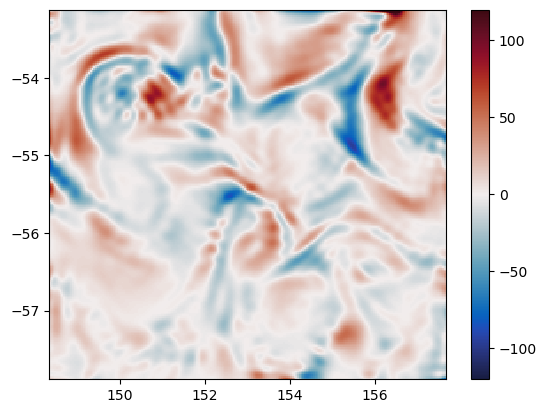

In [14]:
# w.isel(k=30).plot(vmin=-120, vmax=120, cmap=cmocean.cm.balance)


plt.pcolormesh(ds.XC.isel(i=slice(8,-8), j=slice(5,-5)), ds.YC.isel(i=slice(8,-8), j=slice(5,-5)), w.isel(k=30, i=slice(5,-5), j=slice(2,-2)),
               vmin = -120 , vmax=120, cmap=cmocean.cm.balance
              )

plt.colorbar()